<a href="https://colab.research.google.com/github/rahiraja22/ml_project/blob/main/project3_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Step 2: Read the semicolon-separated file
df = pd.read_csv("household_power_consumption.txt.csv", sep=";")

# Step 3: Preview the data
print(df.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


/tmp/ipython-input-1-2375037284.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.txt.csv", sep=";")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387022 entries, 0 to 1387021
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1387022 non-null  object 
 1   Time                   1387022 non-null  object 
 2   Global_active_power    1387022 non-null  object 
 3   Global_reactive_power  1387022 non-null  object 
 4   Voltage                1387022 non-null  object 
 5   Global_intensity       1387022 non-null  object 
 6   Sub_metering_1         1387021 non-null  object 
 7   Sub_metering_2         1387021 non-null  object 
 8   Sub_metering_3         1379569 non-null  float64
dtypes: float64(1), object(8)
memory usage: 95.2+ MB


In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.shape

(1387022, 9)

In [ ]:
df.describe()

,Sub_metering_3
count,1.379569e+06
mean,6.094389e+00
std,8.286563e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [ ]:
# Convert all required columns from object to float directly (inplace replacement)
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage',
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387022 entries, 0 to 1387021
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1387022 non-null  object 
 1   Time                   1387022 non-null  object 
 2   Global_active_power    1379570 non-null  float64
 3   Global_reactive_power  1379570 non-null  float64
 4   Voltage                1379570 non-null  float64
 5   Global_intensity       1379570 non-null  float64
 6   Sub_metering_1         1379569 non-null  float64
 7   Sub_metering_2         1379569 non-null  float64
 8   Sub_metering_3         1379569 non-null  float64
dtypes: float64(7), object(2)
memory usage: 95.2+ MB


In [ ]:
# Remove rows with any null values
df = df.dropna()

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()


In [ ]:
df = df.fillna(df.mean(numeric_only=True))

In [ ]:
df.isnull().sum()


,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [ ]:
# Step 1: Combine Date and Time
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Step 2: Extract Date and Hour
df['Date_only'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

# Step 3: Daily Average
daily_avg = df.groupby('Date_only')['Global_active_power'].mean().reset_index()
daily_avg.columns = ['Date_only', 'Daily_Average_Power']
df = df.merge(daily_avg, on='Date_only', how='left')

# Step 4: Rolling average
df = df.sort_values(by='DateTime')
df['Rolling_Avg_1hr'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()

# Step 5: Peak Hour
peak_hour = df.groupby(['Date_only', 'Hour'])['Global_active_power'].mean().reset_index()
peak_hour = peak_hour.sort_values(['Date_only', 'Global_active_power'], ascending=[True, False])
peak_hour = peak_hour.drop_duplicates('Date_only')
peak_hour.columns = ['Date_only', 'Peak_Hour', 'Peak_Power']
df = df.merge(peak_hour[['Date_only', 'Peak_Hour']], on='Date_only', how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379569 entries, 0 to 1379568
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1379569 non-null  object        
 1   Time                   1379569 non-null  object        
 2   Global_active_power    1379569 non-null  float64       
 3   Global_reactive_power  1379569 non-null  float64       
 4   Voltage                1379569 non-null  float64       
 5   Global_intensity       1379569 non-null  float64       
 6   Sub_metering_1         1379569 non-null  float64       
 7   Sub_metering_2         1379569 non-null  float64       
 8   Sub_metering_3         1379569 non-null  float64       
 9   DateTime               1379569 non-null  datetime64[ns]
 10  Date_only              1379569 non-null  object        
 11  Hour                   1379569 non-null  int32         
 12  Daily_Average_Power    13795

In [ ]:
df['Date_only'] = pd.to_datetime(df['Date_only'])

In [ ]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

/tmp/ipython-input-17-4203790148.py:27: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


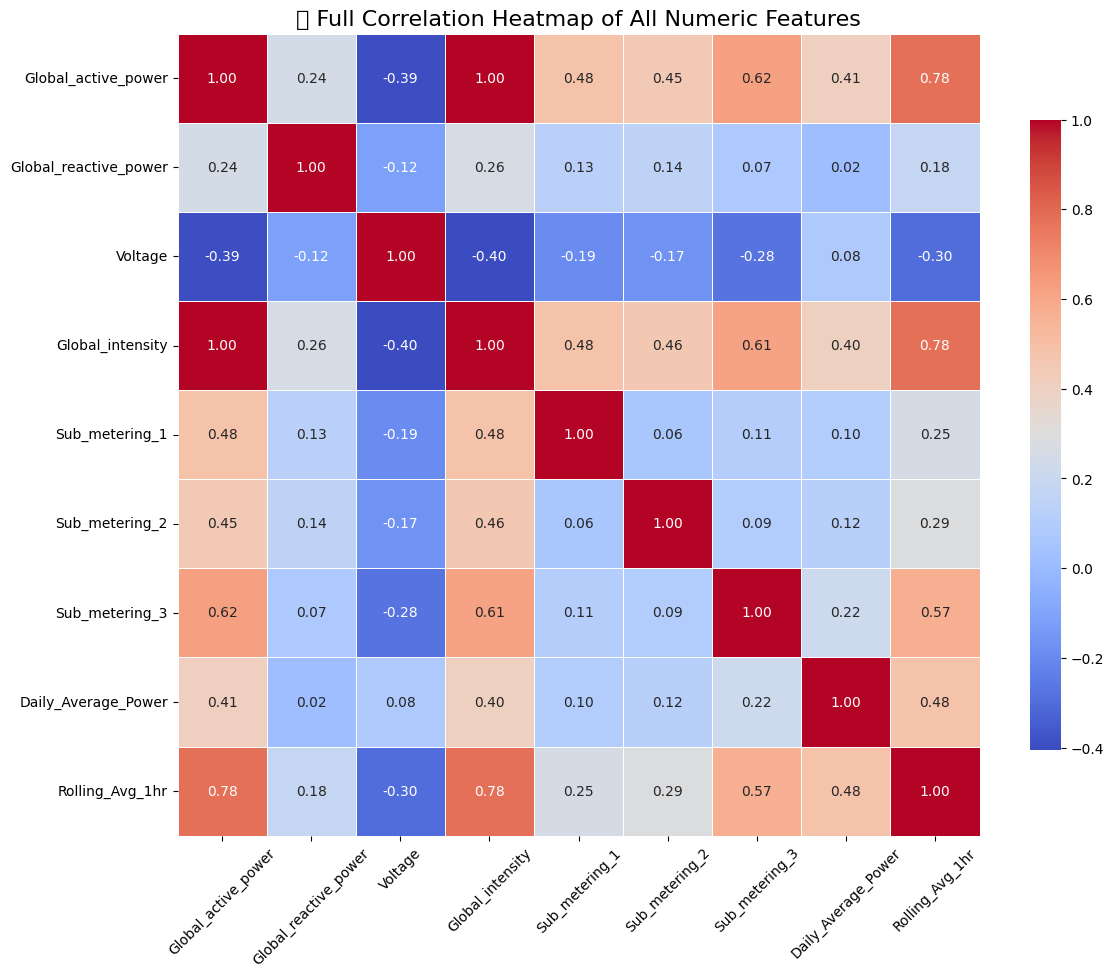

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only numeric columns select
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Set figure size
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,             # Show correlation values
    fmt=".2f",              # Format to 2 decimal points
    cmap='coolwarm',        # Color palette
    linewidths=0.5,         # Line between cells
    square=True,            # Perfect square cells
    cbar_kws={"shrink": 0.75}  # Shrink color bar
)

plt.title("🔗 Full Correlation Heatmap of All Numeric Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Global Active Power (kilowatts)')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


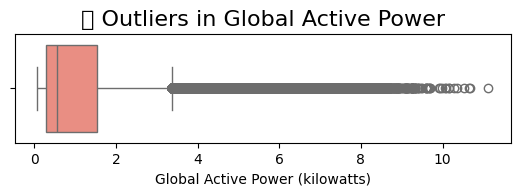

In [ ]:
# 2. Boxplot to check outliers
plt.subplot(3, 1, 2)
sns.boxplot(x=df['Global_active_power'], color='salmon')
plt.title("📦 Outliers in Global Active Power", fontsize=16)
plt.xlabel("Global Active Power (kilowatts)")

Before skewness: 1.7986629124677003


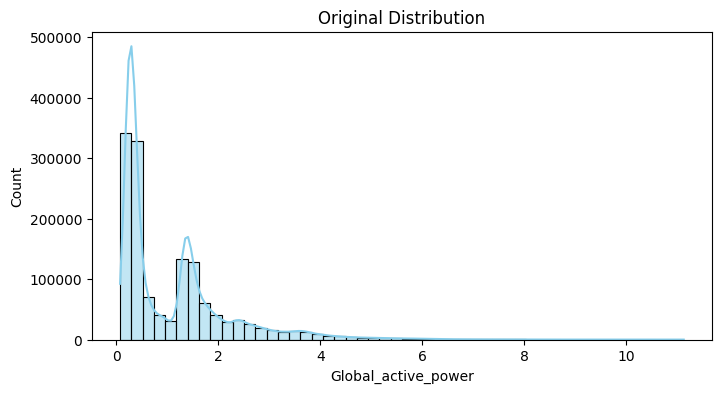

After skewness: 0.7656465191583015


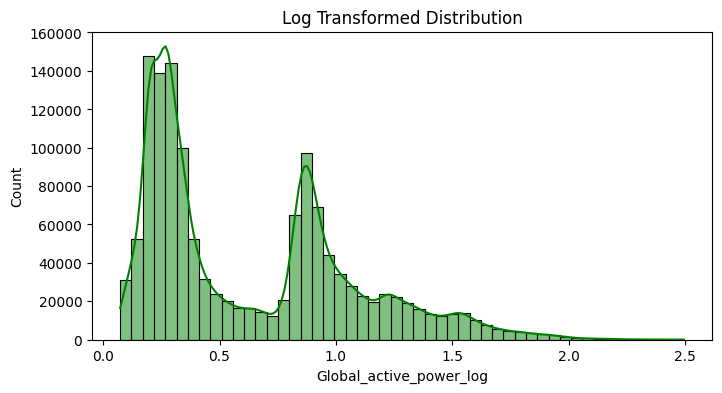

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Skewness before
print("Before skewness:", df['Global_active_power'].skew())

# 2. Plot original distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Global_active_power'], kde=True, bins=50, color='skyblue')
plt.title("Original Distribution")
plt.show()

# 3. Log transform to reduce skewness
df['Global_active_power_log'] = np.log1p(df['Global_active_power'])

# 4. Skewness after
print("After skewness:", df['Global_active_power_log'].skew())

# 5. Plot transformed distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Global_active_power_log'], kde=True, bins=50, color='green')
plt.title("Log Transformed Distribution")
plt.show()

In [ ]:
# IQR calculation
Q1 = df['Global_active_power_log'].quantile(0.25)
Q3 = df['Global_active_power_log'].quantile(0.75)
IQR = Q3 - Q1

# Outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data without outliers
df_clean = df[(df['Global_active_power_log'] >= lower_bound) & (df['Global_active_power_log'] <= upper_bound)]

# Print shapes
print("Before removing outliers:", df.shape)
print("After removing outliers :", df_clean.shape)

Before removing outliers: (1379569, 14)
After removing outliers : (1374412, 14)


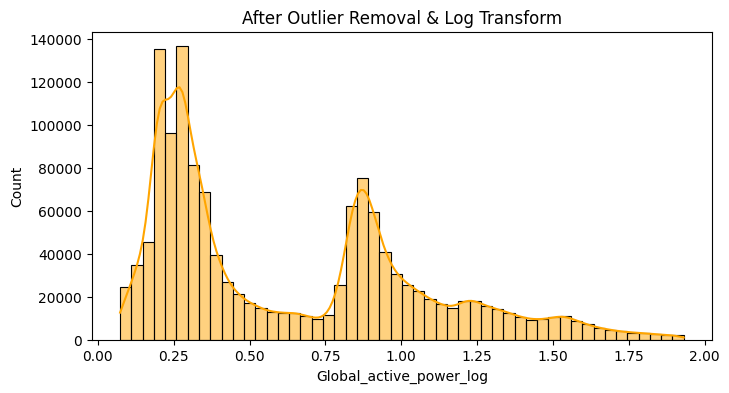

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['Global_active_power_log'], kde=True, bins=50, color='orange')
plt.title("After Outlier Removal & Log Transform")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Features to scale
features_to_scale = ['Global_active_power_log', 'Voltage', 'Global_intensity']

# 2. Create a copy of the cleaned dataframe
df_scaled = df_clean.copy()

# 3. Apply MinMaxScaler
scaler = MinMaxScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define X and y
X = df_scaled[['Voltage', 'Global_intensity']]   # Independent features
y = df_scaled['Global_active_power_log']         # Target

# 2. Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (1099529, 2)
X_test shape : (274883, 2)
y_train shape: (1099529,)
y_test shape : (274883,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Metrics
print("\n📌 Model: Linear Regression")
print("✅ MSE:", mean_squared_error(y_test, y_pred_lr))
print("✅ MAE:", mean_absolute_error(y_test, y_pred_lr))
print("✅ R² Score:", r2_score(y_test, y_pred_lr))
print("✅ Accuracy:", r2_score(y_test, y_pred_lr) * 100, "%")



📌 Model: Linear Regression
✅ MSE: 0.0032483269827207747
✅ MAE: 0.046460117217412694
✅ R² Score: 0.9399802024013556
✅ Accuracy: 93.99802024013556 %


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

# Metrics
print("\n📌 Model: Gradient Boosting Regressor")
print("✅ MSE:", mean_squared_error(y_test, y_pred_gb))
print("✅ MAE:", mean_absolute_error(y_test, y_pred_gb))
print("✅ R² Score:", r2_score(y_test, y_pred_gb))
print("✅ Accuracy:", r2_score(y_test, y_pred_gb) * 100, "%")



📌 Model: Gradient Boosting Regressor
✅ MSE: 0.0001191294822279772
✅ MAE: 0.007181193965314027
✅ R² Score: 0.9977988276890261
✅ Accuracy: 99.77988276890261 %


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

# Metrics
print("\n📌 Model: Neural Network (MLP Regressor)")
print("✅ MSE:", mean_squared_error(y_test, y_pred_mlp))
print("✅ MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("✅ R² Score:", r2_score(y_test, y_pred_mlp))
print("✅ Accuracy:", r2_score(y_test, y_pred_mlp) * 100, "%")



📌 Model: Neural Network (MLP Regressor)
✅ MSE: 0.00012491745764423815
✅ MAE: 0.007166015627829466
✅ R² Score: 0.9976918824477256
✅ Accuracy: 99.76918824477255 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Metrics
print("\n📌 Model: Random Forest Regressor")
print("✅ MSE:", mean_squared_error(y_test, y_pred_rf))
print("✅ MAE:", mean_absolute_error(y_test, y_pred_rf))
print("✅ R² Score:", r2_score(y_test, y_pred_rf))
print("✅ Accuracy:", r2_score(y_test, y_pred_rf) * 100, "%")



📌 Model: Random Forest Regressor
✅ MSE: 0.00012912345388505164
✅ MAE: 0.007424034703481084
✅ R² Score: 0.9976141676596463
✅ Accuracy: 99.76141676596463 %


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


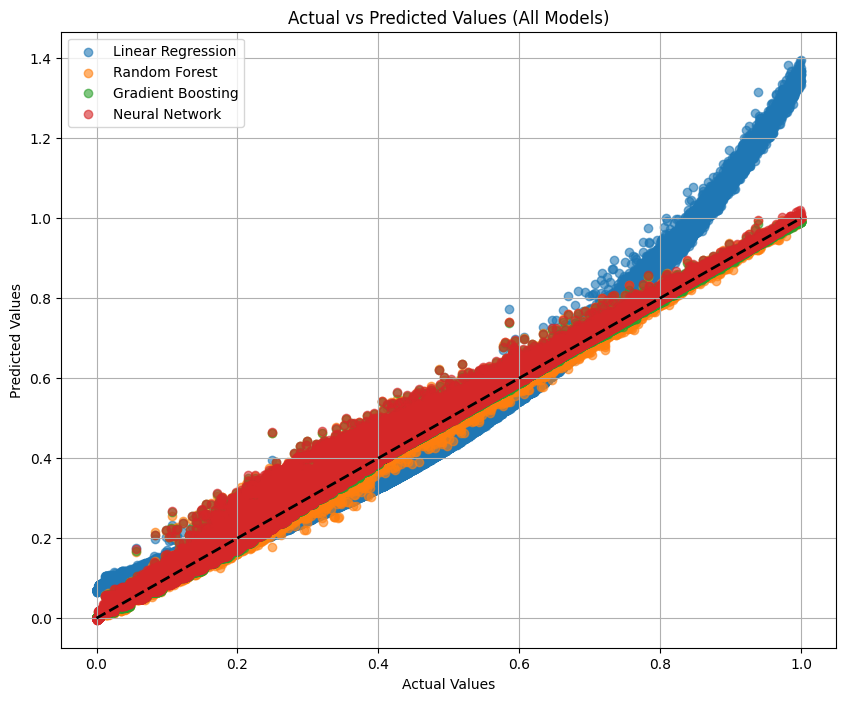

In [ ]:
import matplotlib.pyplot as plt

# Example: Replace these with your model predictions
# You already have y_test (actual values)
# Just ensure the predictions are named as below:
# y_pred_lr = Linear Regression prediction
# y_pred_rf = Random Forest prediction
# y_pred_gb = Gradient Boosting prediction
# y_pred_nn = Neural Network prediction

plt.figure(figsize=(10, 8))

# Linear Regression
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)

# Random Forest
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)

# Gradient Boosting
plt.scatter(y_test, y_pred_gb, label="Gradient Boosting", alpha=0.6)

# Neural Network
plt.scatter(y_test, y_pred_mlp, label="Neural Network", alpha=0.6)

# Reference Line (Perfect Prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Labels & Title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (All Models)")
plt.legend()
plt.grid(True)
plt.show()
